# Comparing  Multinomial with Gaussian NB on MNIST Data

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

### Dataset Preparation

In [5]:
#Load the Sklearn MNIST Dataset
digits = load_digits()   # load data into 'digits'
type(digits)

sklearn.utils.Bunch

In [7]:
X = digits.data    # 'data' stores the X -valuesand 'target' stores y-values
Y = digits.target

In [8]:
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


1


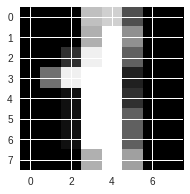

In [13]:
plt.style.use('seaborn')
plt.figure(figsize=(3,3))
plt.imshow(X[1].reshape((8,8)),cmap='gray')
print(Y[1])
plt.show()

In [14]:
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


# Train Models

In [15]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB


In [16]:
mnb = MultinomialNB()   # create obj for Multinomial NB
gnb = GaussianNB()    # create obj for Gaussian NB

In [17]:
# Training
mnb.fit(X,Y)
gnb.fit(X,Y)

GaussianNB()

In [18]:
# check accuracy for both the models  
print(mnb.score(X,Y))
print(gnb.score(X,Y))

0.9053978853644964
0.8580968280467446


In [27]:
## this function takes some model as input and calculate for n number of times
print(cross_val_score(gnb,X,Y,scoring="accuracy",cv=10))
## here we passed acuracy means we wanna calculate accuracy and cv=10 means do 10 times 
## cross_validate means checking again multiple times to cross_validate.
print(cross_val_score(gnb,X,Y,scoring="accuracy",cv=10).mean())  # see average now

[0.76111111 0.81666667 0.90555556 0.68333333 0.73888889 0.83888889
 0.86666667 0.86592179 0.82681564 0.81005587]
0.8113904407200497


In [28]:
cross_val_score(mnb,X,Y,scoring="accuracy",cv=10).mean()

0.8797858472998138

## Confusion Matrix:

In [30]:
from sklearn.metrics import confusion_matrix

y_mnb = mnb.predict(X)
cnf_matrix = confusion_matrix(Y,y_mnb) 
print(cnf_matrix)

[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


##### Note: Diagonal Entries represent: # of elements where predicted class = Actual class 

## Visualise Confusion Matrix


In [31]:
# copy this code from sklearn confusion matrix site
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


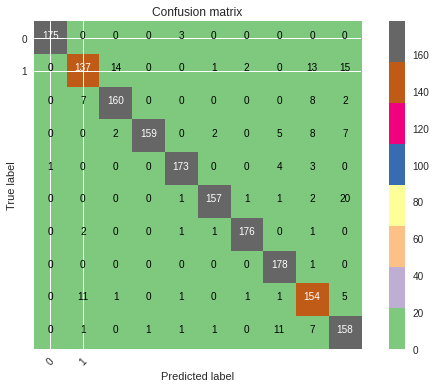

In [34]:
plot_confusion_matrix(cnf_matrix,[0,1],normalize=False, cmap=plt.cm.Accent)

##### Confusion Matrix for Gaussian NB:

Confusion matrix, without normalization
[[176   0   0   0   1   0   0   1   0   0]
 [  0 154   0   0   0   0   3   5  14   6]
 [  0  13 113   0   0   1   1   0  49   0]
 [  0   2   2 145   0   6   0   7  20   1]
 [  1   1   0   0 152   1   2  21   3   0]
 [  0   0   0   3   0 169   1   6   2   1]
 [  0   1   0   0   0   1 179   0   0   0]
 [  0   0   0   0   1   1   0 177   0   0]
 [  0   8   0   1   0   3   0  12 150   0]
 [  1   6   0   5   1   3   0  17  20 127]]


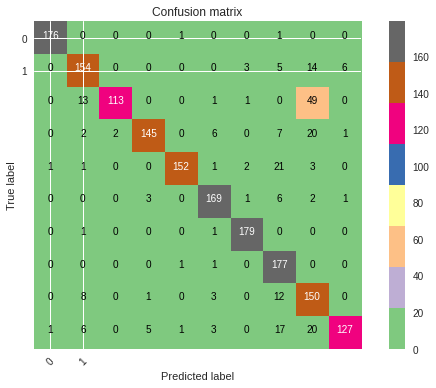

In [36]:
y_gnb = gnb.predict(X)
cnf_matrix = confusion_matrix(Y,y_gnb) 

plot_confusion_matrix(cnf_matrix,[0,1],normalize=False, cmap=plt.cm.Accent)